In [1]:
## Requires condaScanpy1_6_0.yaml

import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import scvelo as scv
import glob
import os

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scv.settings.set_figure_params('scvelo', color_map='cividis')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

-----
anndata     0.7.5
scanpy      1.6.0
sinfo       0.3.1
-----
anndata             0.7.5
backcall            0.1.0
cairo               1.19.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
igraph              0.8.0
importlib_metadata  1.5.0
ipykernel           5.1.4
ipython_genutils    0.2.0
jedi                0.16.0
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     1.2
leidenalg           0.7.0
llvmlite            0.31.0
matplotlib          3.2.1
mpl_toolkits        NA
natsort             7.1.0
numba               0.48.0
numexpr             2.7.2
numpy               1.18.1
packaging           20.8
pandas              1.1.2
parso               0.6.2
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.3
ptyprocess          0.6.0
pygments            2.6.1
pyparsing           2.4.6
pytz

# Merge with Velocyto outputs

In [2]:
# Load transcriptomes
adata_pp_gex=sc.read('Fig1_2_filteredGEX.h5ad')

In [3]:
# Load velocyto
vc_path=''
adata1 = scv.read(glob.glob(vc_path+'CD4-Cre_velocyto/possorted_genome_bam_*.loom')[0], cache=True)
adata2 = scv.read(glob.glob(vc_path+'Lean_velocyto/possorted_genome_bam_*.loom')[0], cache=True)
adata3 = scv.read(glob.glob(vc_path+'Obese_velocyto/possorted_genome_bam_*.loom')[0], cache=True)
adata4 = scv.read(glob.glob(vc_path+'PPARgTKO_velocyto/possorted_genome_bam_*.loom')[0], cache=True)

... reading from cache file cache/wynton-group-ye-cody-marsonlab-sagar-velocyto-CD4-Cre_velocyto-possorted_genome_bam_GO3S9.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/wynton-group-ye-cody-marsonlab-sagar-velocyto-Lean_velocyto-possorted_genome_bam_5YYF3.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/wynton-group-ye-cody-marsonlab-sagar-velocyto-Obese_velocyto-possorted_genome_bam_FDPJN.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/wynton-group-ye-cody-marsonlab-sagar-velocyto-PPARgTKO_velocyto-possorted_genome_bam_G696O.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata1.obs_names_make_unique()
adata2.obs_names_make_unique()
adata3.obs_names_make_unique()
adata4.obs_names_make_unique()

In [5]:
adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()
adata4.var_names_make_unique()

In [6]:
adata_velo = adata1.concatenate(adata2,adata3,adata4)

In [7]:
adata_velo

AnnData object with n_obs × n_vars = 12597 × 31053
    obs: 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [8]:
# Merge
adata = scv.utils.merge(adata_velo,adata_pp_gex)

In [9]:
adata

AnnData object with n_obs × n_vars = 11938 × 16445
    obs: 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'sample_batch', 'sample', 'n_genes', 'n_counts', 'log_counts', 'percent_mito', 'leiden', 'leiden_r1', 'leiden_r0.9'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_r0.9_colors', 'leiden_r1_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [10]:
adata.write('Fig1_2_filteredGEX_velocyto.h5ad')

## Process w Velocyto

In [11]:
adata = sc.read('Fig1_2_filteredGEX_velocyto.h5ad')

In [12]:
sc.pp.log1p(adata)

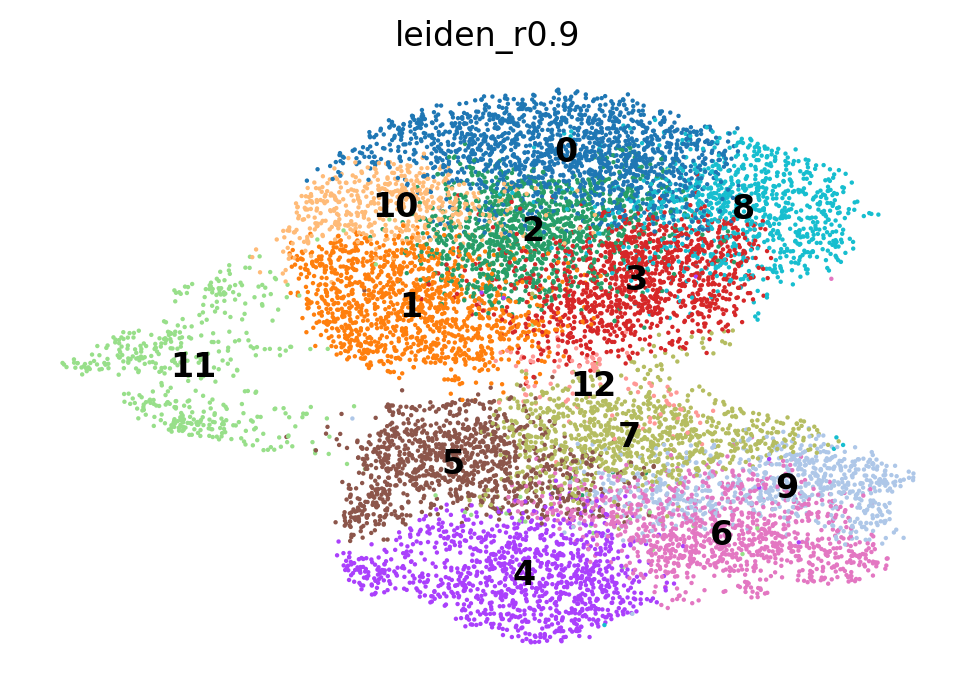

In [13]:
sc.pl.umap(adata, color='leiden_r0.9', legend_loc='on data', size=10, frameon=False)

In [14]:
scv.pp.normalize_per_cell(adata)
adata.raw = adata

Normalized count data: spliced, unspliced.


In [15]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=None)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 10025 genes that are detected 30 counts (shared).
computing neighbors
    finished (0:00:15) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [16]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:10) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [17]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:01:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


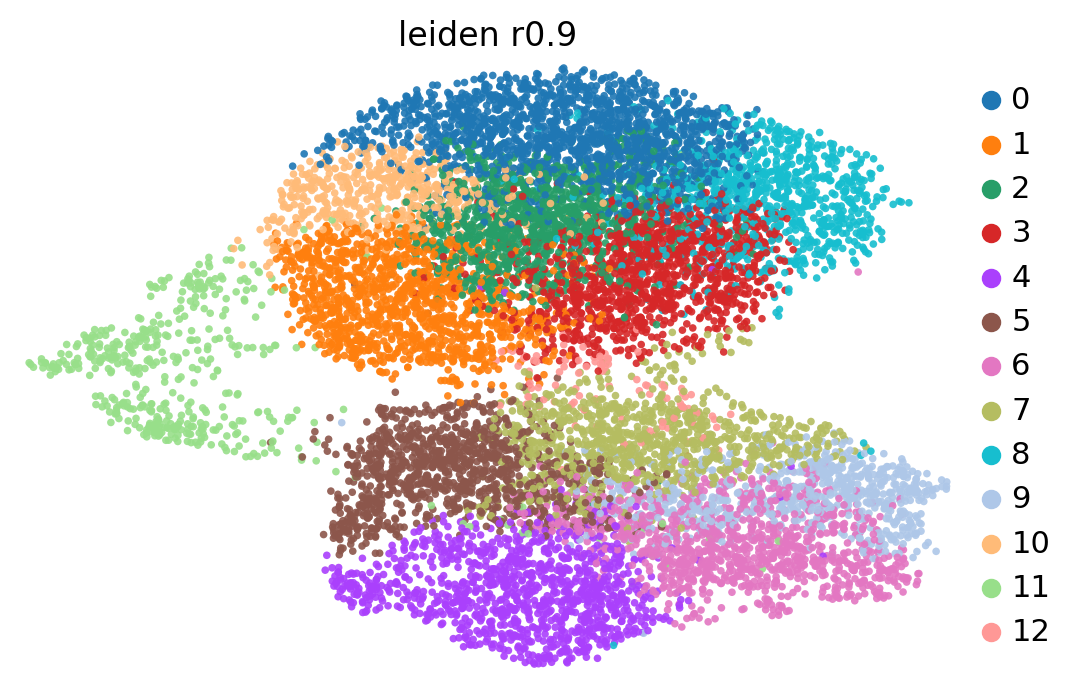

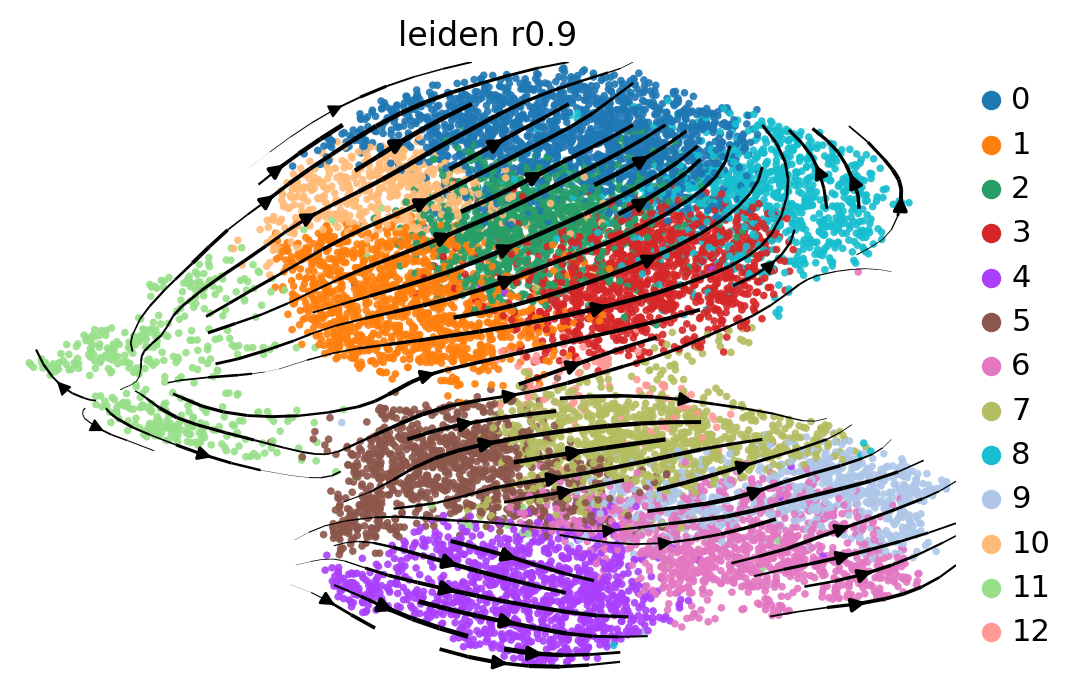

In [18]:
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='right margin', density=0, size=30, alpha=0.9)
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='right margin', density=0.5, size=30, alpha=0.9)

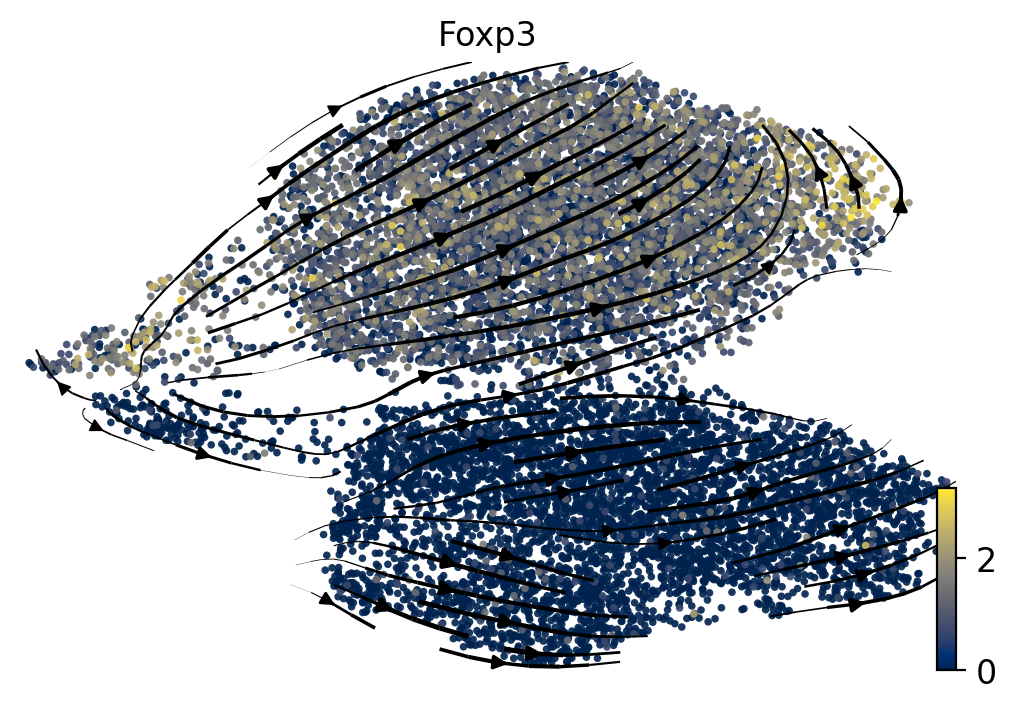

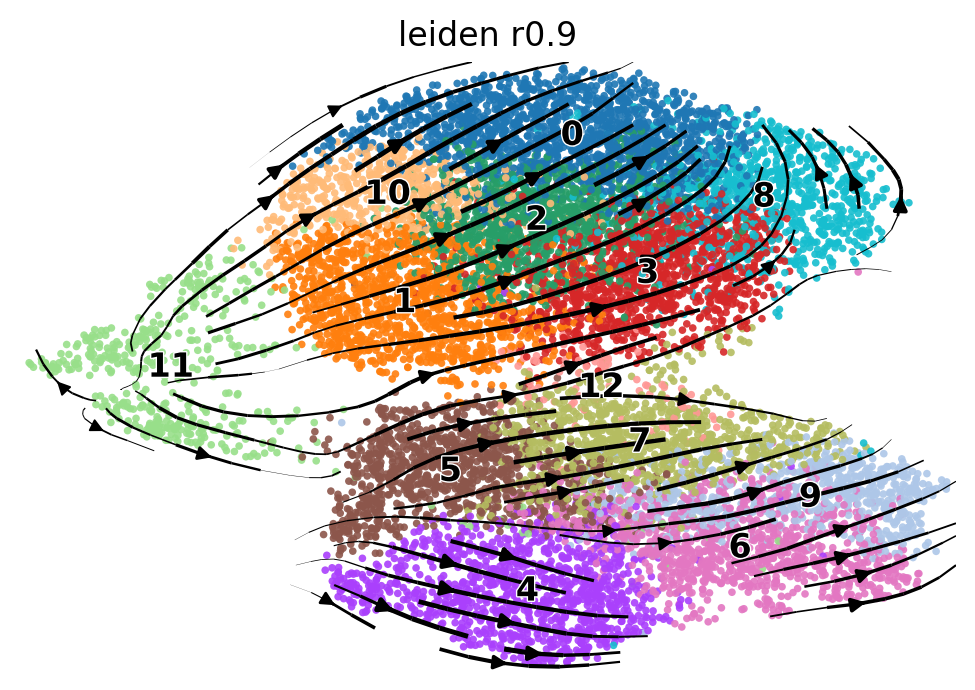

In [19]:
scv.pl.velocity_embedding_stream(adata, color='Foxp3', legend_loc='right margin', density=0.5, size=30, alpha=0.9)
scv.pl.velocity_embedding_stream(adata, color='leiden_r0.9', legend_loc='on data', density=0.5, size=30, alpha=0.9)

In [20]:
## Subset to remove Tregs
subset=['11','5','4','12','7','6','9']
cd4 = adata[adata.obs['leiden_r0.9'].isin(subset)]

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


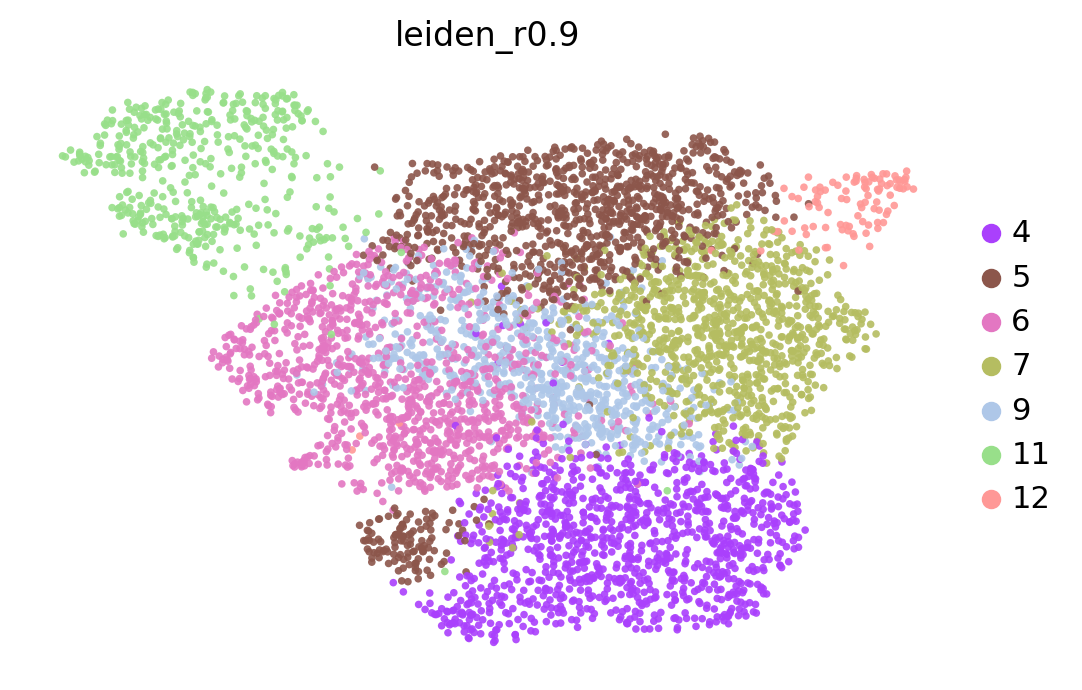

In [21]:
## Recompute umap after subsetting
sc.pp.neighbors(cd4, n_neighbors=25, n_pcs=20, random_state=1)
sc.tl.umap(cd4)
sc.pl.umap(cd4, color='leiden_r0.9', frameon=False, size=30, alpha=0.9)

computing density on 'umap'
--> added
    'umap_density_sample', densities (adata.obs)
    'umap_density_sample_params', parameter (adata.uns)


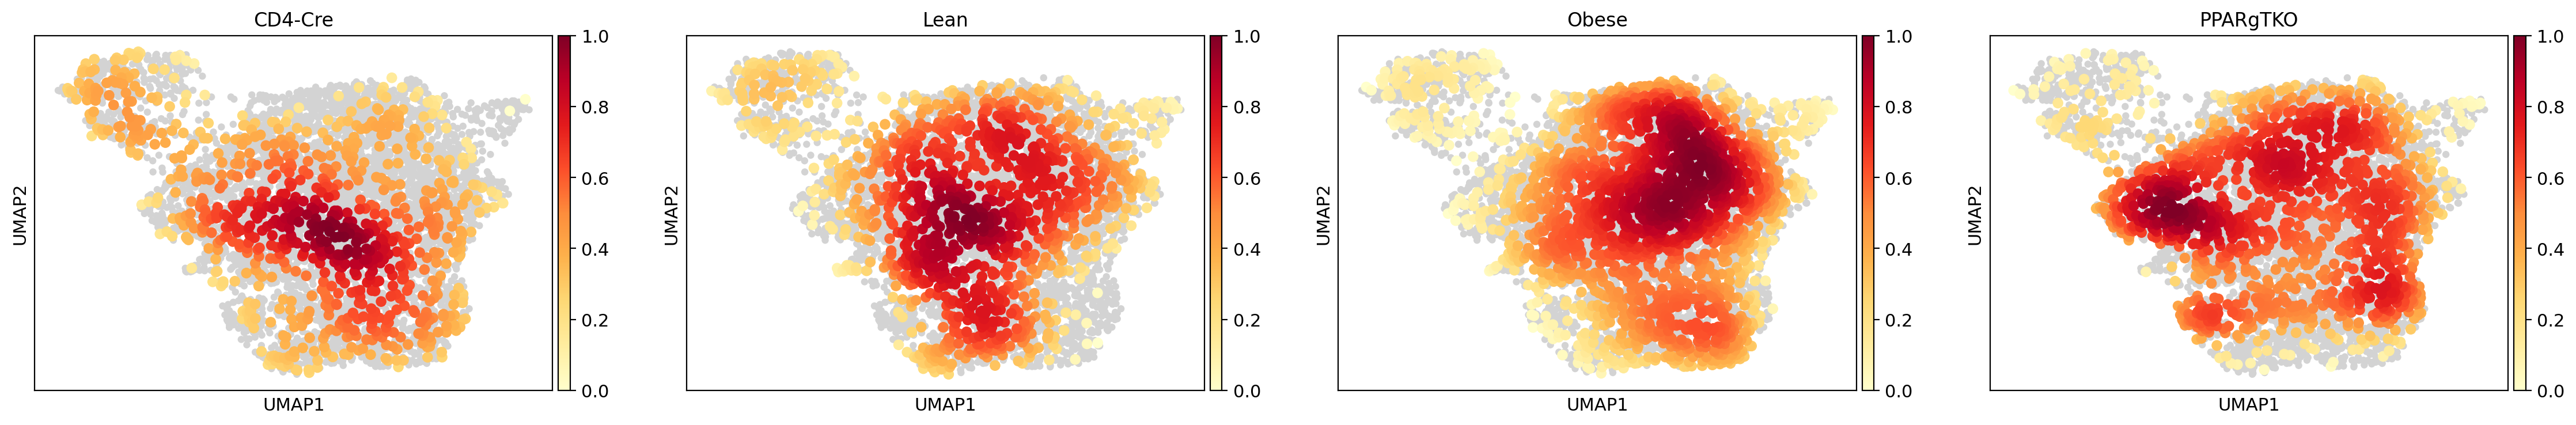

In [22]:
sc.tl.embedding_density(cd4, basis='umap', groupby='sample')
sc.pl.embedding_density(cd4, basis='umap', groupby='sample')

In [23]:
## Refilter after removing Tregs
# scv.pp.filter_genes(cd4, min_shared_counts=10)
scv.pp.filter_genes(cd4, min_shared_counts=30)

Filtered out 1139 genes that are detected 30 counts (shared).


In [24]:
# scv.pp.filter_and_normalize(cd4, min_shared_counts=30, n_top_genes=None)
scv.pp.moments(cd4, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [25]:
scv.tl.velocity(cd4)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [26]:
scv.tl.velocity_graph(cd4)

computing velocity graph
    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


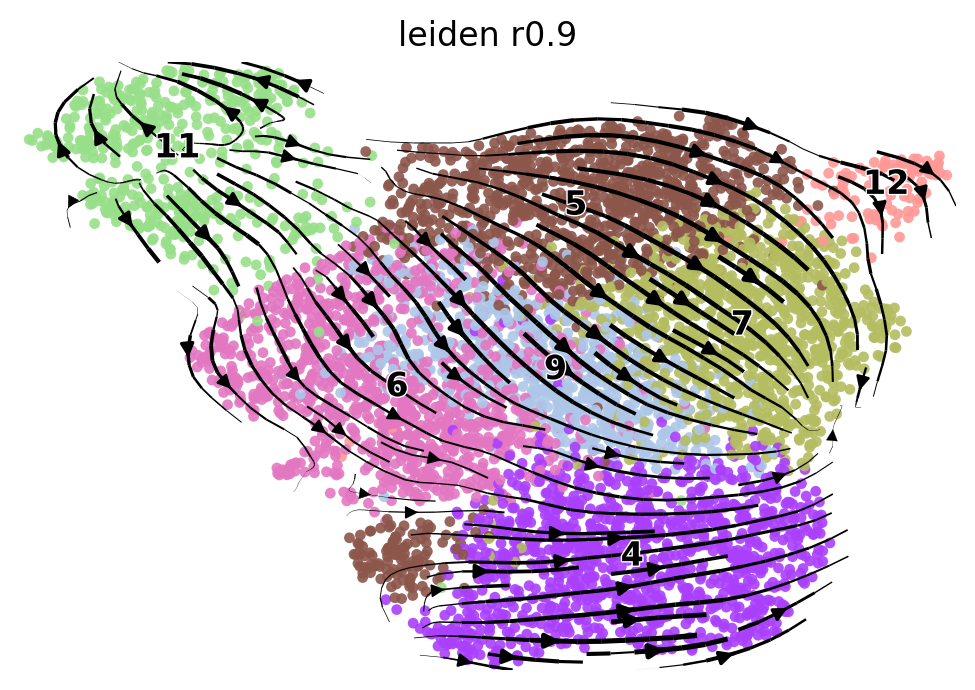

In [27]:
scv.pl.velocity_embedding_stream(cd4, color='leiden_r0.9', legend_loc='on data', size=60, alpha=0.9, density=0.65)

In [28]:
cd4.write('Fig1_2_filteredGEX_velocyto_processed.h5ad')

## Feeds into Figures1_2.ipynb plotting notebook